# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [200]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../Resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [126]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    try:
        if city not in cities:
            cities.append(city)
            print(f"Retrieving data for city: {city}.")
        else:
            print("Duplicate city.  Searching for new city...")
    except:
        print("City not found.")

# Print the city count to confirm sufficient count
len(cities)


Retrieving data for city: rikitea.
Retrieving data for city: punta arenas.
Retrieving data for city: tiksi.
Retrieving data for city: kuryk.
Retrieving data for city: kapaa.
Retrieving data for city: stornoway.
Retrieving data for city: oranjemund.
Retrieving data for city: bilibino.
Retrieving data for city: north bend.
Retrieving data for city: bolungarvik.
Retrieving data for city: bethel.
Retrieving data for city: busselton.
Retrieving data for city: amderma.
Retrieving data for city: san jeronimo.
Retrieving data for city: jamestown.
Retrieving data for city: bredasdorp.
Retrieving data for city: cape town.
Retrieving data for city: taolanaro.
Retrieving data for city: yeppoon.
Retrieving data for city: butaritari.
Retrieving data for city: attawapiskat.
Retrieving data for city: sitka.
Retrieving data for city: moche.
Retrieving data for city: lima.
Retrieving data for city: alofi.
Retrieving data for city: dhidhdhoo.
Retrieving data for city: kenai.
Retrieving data for city: inz

Retrieving data for city: labutta.
Duplicate city.  Searching for new city...
Retrieving data for city: bosaso.
Retrieving data for city: durban.
Retrieving data for city: kawalu.
Retrieving data for city: port elizabeth.
Retrieving data for city: ilongero.
Retrieving data for city: kaitangata.
Retrieving data for city: marsa matruh.
Retrieving data for city: caravelas.
Duplicate city.  Searching for new city...
Retrieving data for city: lebu.
Duplicate city.  Searching for new city...
Retrieving data for city: nantucket.
Retrieving data for city: teguldet.
Duplicate city.  Searching for new city...
Retrieving data for city: tungkang.
Retrieving data for city: bac can.
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Retrieving data for city: acarau.
Retrieving data for city: kamenskoye.
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new 

Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Retrieving data for city: talnakh.
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Retrieving data for city: janauba.
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Retrieving data for city: sri aman.
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Retrieving data for city: mahibadhoo.
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Retrieving data for city: takoradi.
Duplicate city.  Searching for new city...
Ret

Duplicate city.  Searching for new city...
Retrieving data for city: khatanga.
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Retrieving data for city: bereda.
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Retrieving data for city: bam.
Retrieving data for city: akdepe.
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Retrieving data for city: doha.
Retrieving data for city: gusau.
Retrieving data for city: price.
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Retrieving data for city: polunochnoye.
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city

Duplicate city.  Searching for new city...
Retrieving data for city: asyut.
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Retrieving data for city: margate.
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Retrieving data for city: praia.
Retrieving data for city: kulachi.
Duplicate city.  Searching for new city...
Retrieving data for city: rameswaram.
Duplicate city.  Searching for new city...
Retrieving data for city: kogon.
Retrieving data for city: bajil.
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city...
Retrieving data for city: hami.
Duplicate city.  Searching for new city...
Duplicate city.  Searching for new city.

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [132]:
url = "http://api.openweathermap.org/data/2.5/weather?"

citynumber = 1

temp = []
hum = []
cloudiness = []
wind = []
lat = []
cities_list = []

for city in cities:
    
    query_url = url + "q=" + city + "&units=imperial" + "&appid=" + weather_api_key
    city_weather = requests.get(query_url).json()
    time.sleep(2)
    print(f"Retrieving data for city ({citynumber}): {city}")
    cities_list.append(city)
    
    try:
        temp.append(city_weather['main']['temp'])
        hum.append(city_weather['main']['humidity'])
        cloudiness.append(city_weather['clouds']['all'])
        wind.append(city_weather['wind']['speed'])
        lat.append(city_weather['coord']['lat'])
        
    except: 
        print(f"No data for: {city}. Removed from list!")
        cities_list.remove(city)
        
    citynumber += 1

Retrieving data for city (1): rikitea
Retrieving data for city (2): punta arenas
Retrieving data for city (3): tiksi
Retrieving data for city (4): kuryk
Retrieving data for city (5): kapaa
Retrieving data for city (6): stornoway
Retrieving data for city (7): oranjemund
Retrieving data for city (8): bilibino
Retrieving data for city (9): north bend
Retrieving data for city (10): bolungarvik
No data for: bolungarvik. Removed from list!
Retrieving data for city (11): bethel
Retrieving data for city (12): busselton
Retrieving data for city (13): amderma
No data for: amderma. Removed from list!
Retrieving data for city (14): san jeronimo
Retrieving data for city (15): jamestown
Retrieving data for city (16): bredasdorp
Retrieving data for city (17): cape town
Retrieving data for city (18): taolanaro
No data for: taolanaro. Removed from list!
Retrieving data for city (19): yeppoon
Retrieving data for city (20): butaritari
Retrieving data for city (21): attawapiskat
No data for: attawapiskat.

Retrieving data for city (186): acarau
Retrieving data for city (187): kamenskoye
No data for: kamenskoye. Removed from list!
Retrieving data for city (188): eskilstuna
Retrieving data for city (189): nabire
Retrieving data for city (190): tasiilaq
Retrieving data for city (191): la ronge
Retrieving data for city (192): cherskiy
Retrieving data for city (193): pokrovskoye
Retrieving data for city (194): dikson
Retrieving data for city (195): millinocket
Retrieving data for city (196): ndouci
No data for: ndouci. Removed from list!
Retrieving data for city (197): arman
Retrieving data for city (198): dongsheng
Retrieving data for city (199): kodiak
Retrieving data for city (200): chapleau
Retrieving data for city (201): salalah
Retrieving data for city (202): samalaeulu
No data for: samalaeulu. Removed from list!
Retrieving data for city (203): dudinka
Retrieving data for city (204): novo aripuana
Retrieving data for city (205): longyearbyen
Retrieving data for city (206): bernay
Retrie

Retrieving data for city (364): buala
Retrieving data for city (365): bien hoa
Retrieving data for city (366): matagami
Retrieving data for city (367): hovd
Retrieving data for city (368): richard toll
No data for: richard toll. Removed from list!
Retrieving data for city (369): rio grande
Retrieving data for city (370): ciras
No data for: ciras. Removed from list!
Retrieving data for city (371): basavakalyan
Retrieving data for city (372): havre-saint-pierre
Retrieving data for city (373): mount isa
Retrieving data for city (374): sola
Retrieving data for city (375): kursumlija
Retrieving data for city (376): kudahuvadhoo
Retrieving data for city (377): aswan
Retrieving data for city (378): yaan
Retrieving data for city (379): port-gentil
Retrieving data for city (380): khatanga
Retrieving data for city (381): bereda
Retrieving data for city (382): bam
Retrieving data for city (383): akdepe
Retrieving data for city (384): doha
Retrieving data for city (385): gusau
Retrieving data for 

Retrieving data for city (551): matara
Retrieving data for city (552): erzin
Retrieving data for city (553): los andes
Retrieving data for city (554): paranhos
Retrieving data for city (555): we
No data for: we. Removed from list!
Retrieving data for city (556): egvekinot
Retrieving data for city (557): muros
Retrieving data for city (558): angra
No data for: angra. Removed from list!
Retrieving data for city (559): damietta
Retrieving data for city (560): amarante do maranhao
Retrieving data for city (561): eregli
Retrieving data for city (562): soyo
Retrieving data for city (563): kibre mengist
Retrieving data for city (564): sulina
Retrieving data for city (565): caramay
Retrieving data for city (566): kyren
Retrieving data for city (567): nizhnevartovsk
Retrieving data for city (568): yumen
Retrieving data for city (569): ayan
Retrieving data for city (570): ust-omchug
Retrieving data for city (571): kombissiri
Retrieving data for city (572): tenenkou
Retrieving data for city (573)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [224]:
weather_dict = {
    "City": cities_list,
    "Temperature": temp,
    "Humidity": hum,
    "Cloudiness": cloudiness,
    "Wind Speed": wind,
    "Latitude": lat,
}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv('output_data/weather_data.csv')

weather_data

,City,Temperature,Humidity,Cloudiness,Wind Speed,Latitude
0,rikitea,78.98,70,99,7.45,-23.1203
1,punta arenas,53.29,54,75,19.57,-53.1500
2,tiksi,-27.76,84,74,7.20,71.6872
3,kuryk,17.08,87,88,22.35,43.2000
4,kapaa,71.47,78,75,17.27,22.0752
...,...,...,...,...,...,...
551,pokrovsk,11.57,89,0,12.41,48.2820
552,akureyri,30.20,93,75,9.22,65.6835
553,leshukonskoye,-8.70,90,28,3.13,64.8989
554,rio gallegos,55.40,41,0,14.97,-51.6226


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [225]:
#ensuring no cities have humidity values > 100
weather_data['Humidity'].sort_values(ascending=False)

398    100
256    100
53     100
88     100
288    100
      ... 
215     10
337      9
452      8
519      8
518      8
Name: Humidity, Length: 556, dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [226]:
weather_data

,City,Temperature,Humidity,Cloudiness,Wind Speed,Latitude
0,rikitea,78.98,70,99,7.45,-23.1203
1,punta arenas,53.29,54,75,19.57,-53.1500
2,tiksi,-27.76,84,74,7.20,71.6872
3,kuryk,17.08,87,88,22.35,43.2000
4,kapaa,71.47,78,75,17.27,22.0752
...,...,...,...,...,...,...
551,pokrovsk,11.57,89,0,12.41,48.2820
552,akureyri,30.20,93,75,9.22,65.6835
553,leshukonskoye,-8.70,90,28,3.13,64.8989
554,rio gallegos,55.40,41,0,14.97,-51.6226


## Latitude vs. Temperature Plot

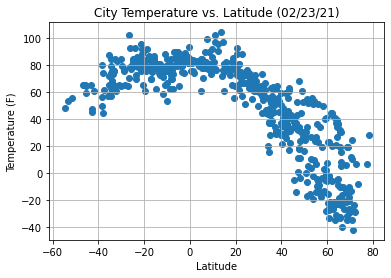

In [227]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("City Temperature vs. Latitude (02/23/21)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CitiesTempvsLatitude.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

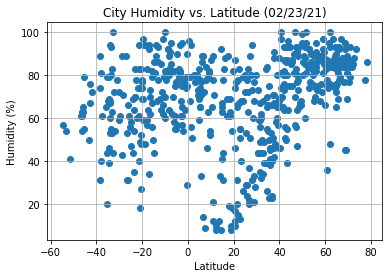

In [228]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Humidity vs. Latitude (02/23/21)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CitiesHumidityvsLatitude.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

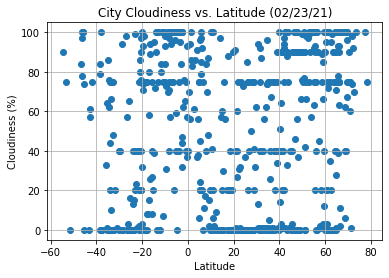

In [229]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Cloudiness vs. Latitude (02/23/21)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CitiesCloudinessvsLatitude.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

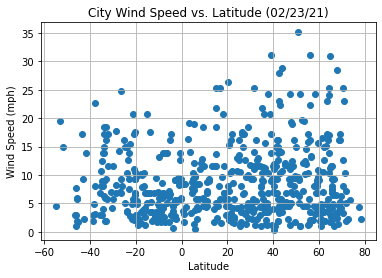

In [230]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Wind Speed vs. Latitude (02/23/21)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/WindSpeedvsLatitude.png")

# Show plot
plt.show()

## Linear Regression

In [231]:
weather_data

,City,Temperature,Humidity,Cloudiness,Wind Speed,Latitude
0,rikitea,78.98,70,99,7.45,-23.1203
1,punta arenas,53.29,54,75,19.57,-53.1500
2,tiksi,-27.76,84,74,7.20,71.6872
3,kuryk,17.08,87,88,22.35,43.2000
4,kapaa,71.47,78,75,17.27,22.0752
...,...,...,...,...,...,...
551,pokrovsk,11.57,89,0,12.41,48.2820
552,akureyri,30.20,93,75,9.22,65.6835
553,leshukonskoye,-8.70,90,28,3.13,64.8989
554,rio gallegos,55.40,41,0,14.97,-51.6226


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [232]:
north_hem = weather_data[weather_data['Latitude'] >= 0]
south_hem = weather_data[weather_data['Latitude'] < 0]

north_latitudes = north_hem['Latitude']
north_temp = north_hem['Temperature']
north_cloud = north_hem['Cloudiness']
north_wind = north_hem['Wind Speed']
north_hum = north_hem['Humidity']

south_latitudes = south_hem['Latitude']
south_temp = south_hem['Temperature']
south_cloud = south_hem['Cloudiness']
south_wind = south_hem['Wind Speed']
south_hum = south_hem['Humidity']

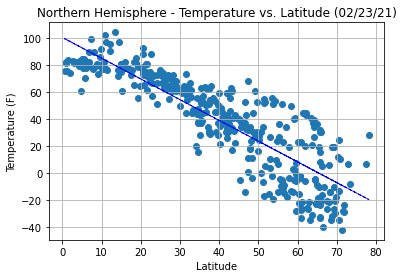

In [233]:
# Build a scatter plot for each data type
plt.scatter(north_hem["Latitude"], north_hem["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Temperature vs. Latitude (02/23/21)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

nt_slope, nt_int, nt_r, nt_p, nt_std_err = linregress(north_latitudes, north_temp)

nt_fit = nt_slope * north_latitudes + nt_int

plt.plot(north_latitudes, nt_fit, "b--", linewidth=1)
# Save the figure
plt.savefig("output_data/NorthHemTempvsLatitude.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

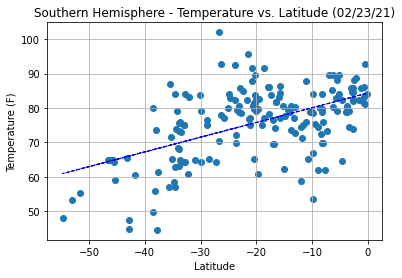

In [234]:
# Build a scatter plot for each data type
plt.scatter(south_hem["Latitude"], south_hem["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Temperature vs. Latitude (02/23/21)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

st_slope, st_int, st_r, st_p, st_std_err = linregress(south_latitudes, south_temp)

st_fit = st_slope * south_latitudes + st_int

plt.plot(south_latitudes, st_fit, "b--", linewidth=1)

# Save the figure
plt.savefig("output_data/SouthHemTempvsLatitude.png")

# Show plot
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

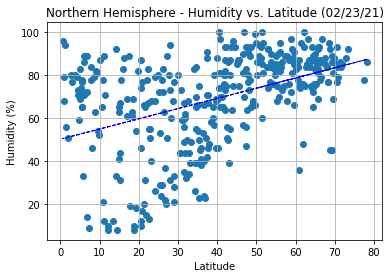

In [235]:


# Build a scatter plot for each data type
plt.scatter(north_hem["Latitude"], north_hem["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Humidity vs. Latitude (02/23/21)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

nh_slope, nh_int, nh_r, nh_p, nh_std_err = linregress(north_latitudes, north_hum)

nh_fit = nh_slope * north_latitudes + nh_int

plt.plot(north_latitudes, nh_fit, "b--", linewidth=1)

# Save the figure
plt.savefig("output_data/NorthHemHumvsLatitude.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

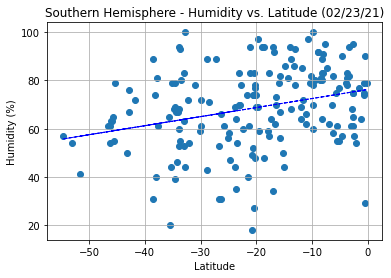

In [236]:


# Build a scatter plot for each data type
plt.scatter(south_hem["Latitude"], south_hem["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Humidity vs. Latitude (02/23/21)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

sh_slope, sh_int, sh_r, sh_p, sh_std_err = linregress(south_latitudes, south_hum)

sh_fit = sh_slope * south_latitudes + sh_int

plt.plot(south_latitudes, sh_fit, "b--", linewidth=1)

# Save the figure
plt.savefig("output_data/SouthHemHumvsLatitude.png")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

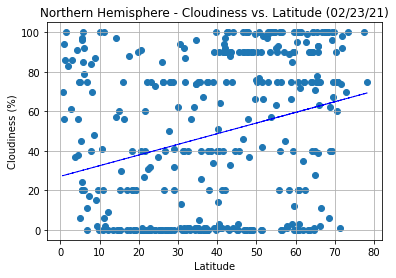

In [237]:
# Build a scatter plot for each data type
plt.scatter(north_hem["Latitude"], north_hem["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Cloudiness vs. Latitude (02/23/21)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

nc_slope, nc_int, nc_r, nc_p, nc_std_err = linregress(north_latitudes, north_cloud)

nc_fit = nc_slope * north_latitudes + nc_int

plt.plot(north_latitudes, nc_fit, "b--", linewidth=1)

# Save the figure
plt.savefig("output_data/NorthHemCloudvsLatitude.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

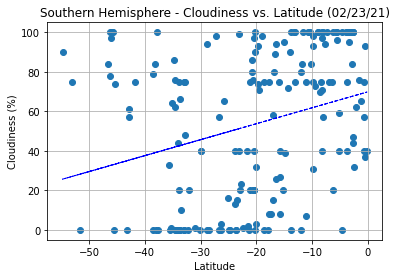

In [238]:

# Build a scatter plot for each data type
plt.scatter(south_hem["Latitude"], south_hem["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Cloudiness vs. Latitude (02/23/21)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

sc_slope, sc_int, sc_r, sc_p, sc_std_err = linregress(south_latitudes, south_cloud)

sc_fit = sc_slope * south_latitudes + sc_int

plt.plot(south_latitudes, sc_fit, "b--", linewidth=1)

# Save the figure
plt.savefig("output_data/SouthHemCloudvsLatitude.png")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

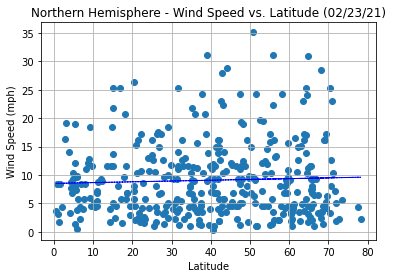

In [222]:
# Build a scatter plot for each data type
plt.scatter(north_hem["Latitude"], north_hem["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Northern Hemisphere - Wind Speed vs. Latitude (02/23/21)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

nw_slope, nw_int, nw_r, nw_p, nw_std_err = linregress(north_latitudes, north_wind)

nw_fit = nw_slope * north_latitudes + nw_int

plt.plot(north_latitudes, nw_fit, "b--", linewidth=1)

# Save the figure
plt.savefig("output_data/NorthHemWindvsLatitude.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

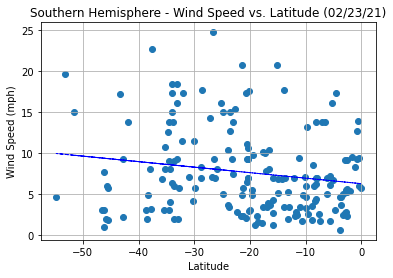

In [213]:
# Build a scatter plot for each data type
plt.scatter(south_hem["Latitude"], south_hem["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Southern Hemisphere - Wind Speed vs. Latitude (02/23/21)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

sw_slope, sw_int, sw_r, sw_p, sw_std_err = linregress(south_latitudes, south_wind)

sw_fit = sw_slope * south_latitudes + sw_int

plt.plot(south_latitudes, sw_fit, "b--", linewidth=1)

# Save the figure
plt.savefig("output_data/SouthHemWindvsLatitude.png")

# Show plot
plt.show()